In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
dataframe = pd.read_csv("/content/sample_data/Data.csv")

In [17]:
dataframe.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [18]:
dataframe=dataframe.dropna()

In [19]:
dataframe.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [20]:
## creating an (1 X n) matrix of air quality index
def air_quality_index_label(row):
    val = row['PM 2.5']
    if val <= 50:
        return "Good"
    elif val <= 100:
        return "Moderate"
    elif val <= 150:
        return "Unhealthy"
    elif val <= 200:
        return "Unhealthy for Strong People"
    else:
        return "Hazardous"
    
air_quality = dataframe.apply(air_quality_index_label, axis=1)

In [21]:
categorical_dataframe = dataframe.drop(['PM 2.5'], axis=1)
categorical_dataframe.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

In [22]:
categorical_dataframe["Quality"] = air_quality
categorical_dataframe.head()

,T,TM,Tm,SLP,H,VV,V,VM,Quality
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,Hazardous
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,Unhealthy for Strong People
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,Unhealthy for Strong People
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,Hazardous
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,Hazardous


In [23]:
cor_mat = dataframe.corr()

In [24]:
cor_mat

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


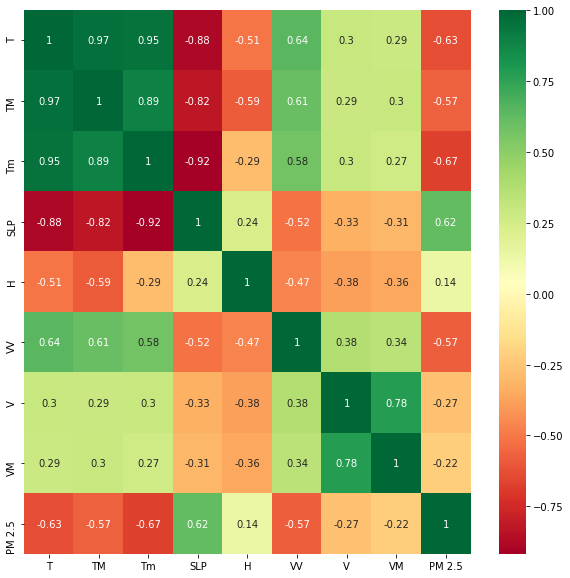

In [25]:
top_corr_features = cor_mat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
# removing PM 2.5 = 0 rows
zero_pm_values = dataframe.index[dataframe['PM 2.5'] == True].tolist()
df2 = dataframe.drop(zero_pm_values, axis=0)
Y = df2['PM 2.5']
X = df2.drop(['PM 2.5'], axis=1)

[0.12997975 0.129083   0.12884845 0.12865601 0.12717805 0.12177938
 0.12616744 0.10830793]


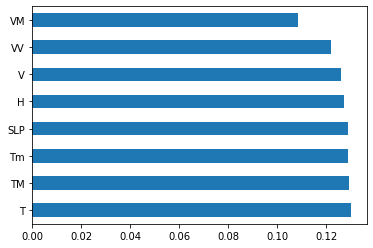

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,np.array(Y, dtype=np.int64))
# use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X)).plot(kind='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=4)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
reg.coef_

array([ -1.52106239,   0.89432938,  -5.03108116,   0.19429328,
        -1.07921902, -36.79188723,  -1.92770436,   0.51430788])

In [33]:
reg.intercept_

167.52513302898893

In [34]:
Y_predic=reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


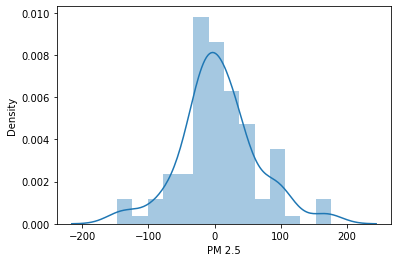

In [35]:
sns.distplot(Y_test-Y_predic)

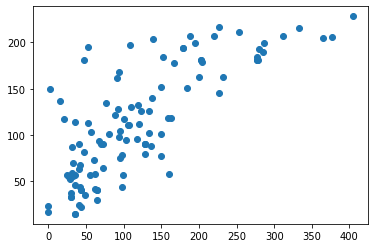

In [36]:
plt.scatter(Y_test,Y_predic)

In [37]:
reg.score(X_test, Y_test)

0.5802720678731238

In [38]:
reg.score(X_train, Y_train)

0.5263281020265338

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(reg, X_train, Y_train, cv=5)

array([0.47601797, 0.52809419, 0.54777608, 0.54880269, 0.49390559])